# Exploratory Data Analysis - Titanic Dataset

## Summary

The goal of this analysis is to expolore and understand the dataset in order to gain insights that will help us in building a machine learning model to predict the survival of the passenger.

---

## Data Quality Assessment

There are 11 columns, 891 rows in the dataset.

- PassengerID   - [int]   - Passenger ID
- Survived      - [int]   - Weather Survived or not: 0 = No, 1 = Yes
- Pclass        - [int]   - Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
- Name          - [str]   - Name of the Passenger
- Sex           - [str]   - Gender
- Age           - [float] - Age in Years
- SibSp         - [int]   - No. of siblings / spouses aboard the Titanic
- Parch         - [int]   - No. of parents / children aboard the Titanic
- Ticket        - [str]   - Ticket number
- Fare          - [float] - Passenger fare
- Cabin         - [str]   - Cabin number
- Embarked      - [str]   - Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

##### **Overview**:

- **Age** column contains 177 missing values (~20%)

- **Cabin** column contains 687 missing values (~77%)

- **Embarked** column contains 2 missing values

- There are no duplicate rows in the dataset

- Survived is the target column

##### **Free fares**:

The **Fare** column contains 15 records with 0.0 prices. There is no evidence in the dataset to support that these values are correct.

##### **Way too cheap ticket**:

The **Fare** column contains a records of 1 first class ticket [Ticket = "695"] with the *outlier* price of 5.0. All other first class ticket prices start above 25.0. This is the only record with this exact ticket id.

There is another ticket [Ticket = "PC 17755"] to the same cabins [Cabin = "B51 B53 B55"] with the price of 512.3292. This same ticket [Ticket = "PC 17755"] belongs to 3 passengers and 5 cabins (including a NaN value).

Based on [Ticket = "PC 17755"], the fair and correct price for [Ticket = "695"] could be any of the following:

- 512.3292 / 3 ~= 170.77 - if we assume the price of [Ticket = "PC 17755"] depends on the number of passengers it belongs to

- 512.3292 * 3 / 4 ~= 384.25 - if we assume [Ticket = "PC 17755"] buys 4 cabins (not including the NaN value) and each cabin is equally priced.

- 512.3292 * 3 / 5 ~= 307.4 - if we assume [Ticket = "PC 17755"] buys 5 cabins (including the NaN value) and each cabin is equally priced.

- ~86.15 - if we assume there is no correlation between these two tickets and we use the mean first class **Fare** value.

##### **Missing values**:

**Embarked**: The rows with missing values have no correlation to other rows. Noone else is in the same cabin. Other tickets to the B deck have 23 'S' values and 22 'C' values.

**Fare**: Free tickets cannot be connected cabins with normal prices. There is also no connection to the ticket ID with in other data points.

---

## Findings

1. Gender distribution: 64.8% is male, 35.2% is female

2. Adult-Child distribution: 72.4% are adults, 7.7% are children, 19.9% are unknown

3. Survival rate: 38.4% survived, 61.6% died

4. Ticket classes: 24.2% first class, 20.7% second class, 55.1% third class

5. The **Age** distribution has a positiv skew, peaking between 18-30 years. Quickly drops between 10-14 years, and has a second lower peak between 0-6 years.

### Questions

Some generic questions to give an initial direction. Additional questions might be added throughout the notebook.

1. What is the gender ratio on board?

2. How does the age distribution look like?

3. How were ticket classes priced?

4. Can we see a correlation with the age of the passengers and the ticket class they had?

5. Are older passengers wealthier?

6. What is the gender ratio of passengers traveling alone?

7. Did passengers traveling alone have better or worse survival rate?

8. How did the "Women and children" rule affect the survival rate of these two groups? (Children will be counted as <=12 years old)

---

# Libraries, constants, data import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
BLUE='#4D99FF'
RED='#FF564D'
GREEN='#77FF4D'
GRAY='#919191'

In [3]:
df = pd.read_csv('../data/titanic.csv', index_col='PassengerId')

---

## Data Quality Assessment

The following section contains basic information about the dataset such as:

Dataset size, data types, unique values, missing values, duplicate rows and distributions of the numeric features.

In [4]:
print(f"Dataset (rows, cols) = {df.shape}\n")
print(f"--------------------\n")
df.info()
print(f"\n--------------------\n")
print(f"Unique values per column:\n{df.nunique()}\n")
print(f"--------------------\n")
print(f"Missing values per column:\n{df.isnull().sum()}\n")
print(f"--------------------\n")
print(f"Duplicate row count: {int(df.duplicated().sum())}\n")

Dataset (rows, cols) = (891, 11)

--------------------

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB

--------------------

Unique values per column:
Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

--------------------

Missing value

Inspect the first couple rows of the dataset

In [5]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Statistics of the numeric features

In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Investigation 1 - Data precision in the Age column

The age column has a minimum value of 0.42 years. We can inspect the data to see if all values in the Age column are this precise. The answer is no. Passenger at least 1 year old have integer numbers given as age.

In [7]:
df['Age'].sort_values().head(10)

PassengerId
804    0.42
756    0.67
645    0.75
470    0.75
79     0.83
832    0.83
306    0.92
387    1.00
173    1.00
184    1.00
Name: Age, dtype: float64

---

### Investigation 2 - Free tickets

Is 0.0 Fare an error/missing value in the data? Were there actual passengers on board for free?

In [8]:
df_zero_fare = df[df['Fare'] == 0.0]

print(f"Number of free tickets: {df_zero_fare.shape[0]}\n")
print(f"--------------------\n")
print(df_zero_fare['Pclass'].value_counts())
print(f"\n--------------------\n")
df_zero_fare

Number of free tickets: 15

--------------------

Pclass
2    6
1    5
3    4
Name: count, dtype: int64

--------------------



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


There are 15 records with 0.0 fare. They are almost uniformly distributed between the classes. There doesnt seem to be a clearly identifiable pattern. Going to handle them as missing values.

In [9]:
df['Fare'] = df['Fare'].replace(to_replace=0.0, value=pd.NA)

## Correlation

Simple correlation between the columns

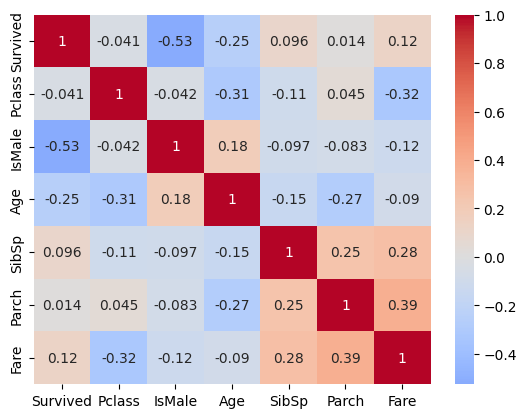

In [10]:
df['IsMale'] = df['Sex'] == 'male'
df_non_na = df.dropna()
df_numeric = df_non_na[
    ['Survived', 'Pclass', 'IsMale', 'Age', 'SibSp', 'Parch', 'Fare']
]
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.show()

From this correlation matrix we could assume the following:

- Men in general had a worse chance to survive

- Pclass doesn't seem to have a significant impact on survival. I guess there was no priority life rafts for first class passengers

- Men and women seems to be evenly distributed between Pclasses

- A slight inverse correlation seems to emerge between the Age and Survived columns. Probably skewed by the children, who were saved regardless of gender, but moslty women survived from the older generations

- People traveling with family seems to have paid more for the tickets

## Pairplot of numeric values

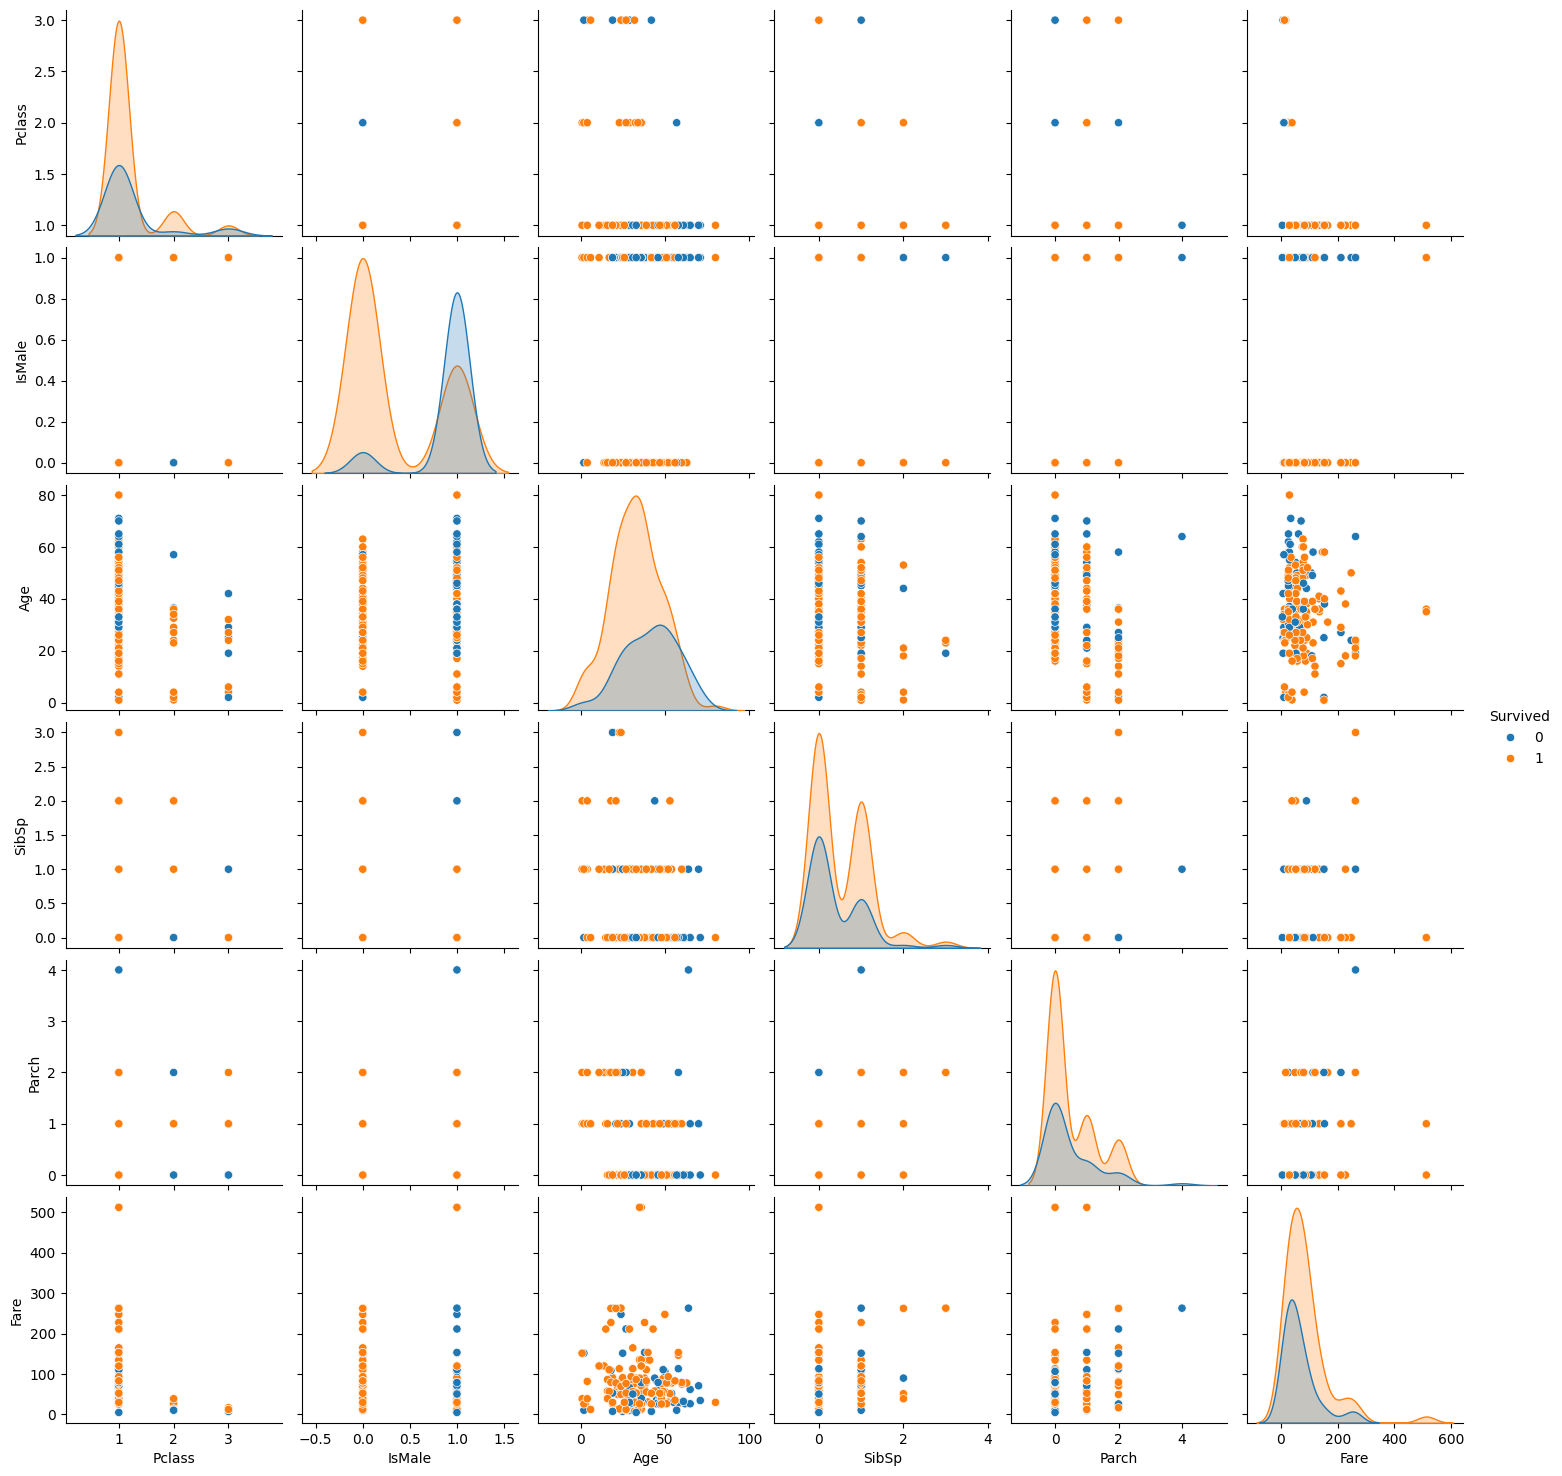

In [11]:
sns.pairplot(df_numeric, hue='Survived')
plt.show()

---

### Q1 - What is the gender ratio on board?

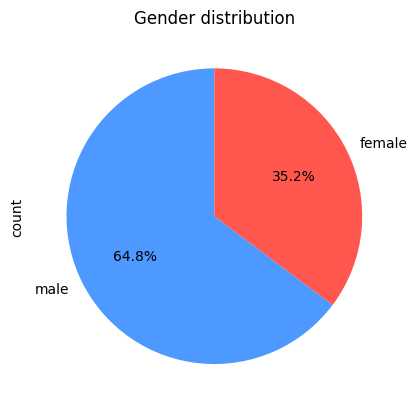

In [12]:
value_counts = df['Sex'].value_counts()
colors = [BLUE if v == 'male' else RED for v in value_counts.index]
value_counts.plot(
    kind='pie',
    startangle=90,
    autopct='%1.1f%%',
    title='Gender distribution',
    colors=colors,
)
plt.show()

---

#### Other distributions

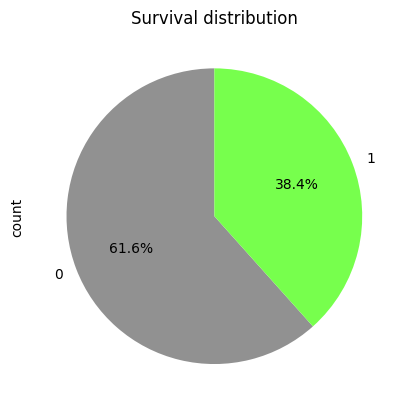

In [13]:
value_counts = df['Survived'].value_counts()
colors = [GRAY if v == 0 else GREEN for v in value_counts.index]
value_counts.plot(
    kind='pie',
    startangle=90,
    autopct='%1.1f%%',
    title='Survival distribution',
    colors=colors,
)
plt.show()

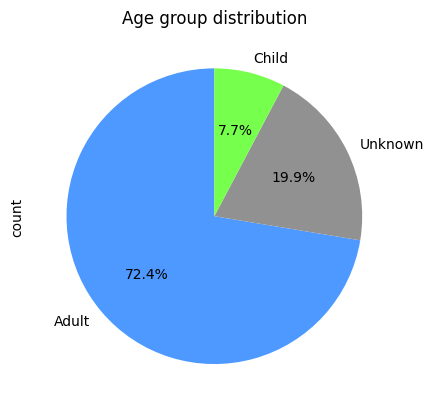

In [14]:
is_adult = df['Age'].apply(
    lambda x: 
        'Adult'
        if pd.notna(x) and x > 12.0 
        else ("Child" if pd.notna(x) else 'Unknown')
)
value_counts = is_adult.value_counts()
colors = [
    BLUE
    if v == 'Adult'
    else (GREEN if v == 'Child' else GRAY)
    for v in value_counts.index
]
value_counts.plot(
    kind='pie',
    startangle=90,
    autopct='%1.1f%%',
    title='Age group distribution',
    colors=colors,
)
plt.show()

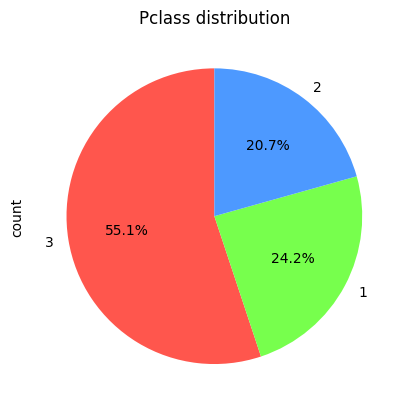

In [15]:
value_counts = df['Pclass'].value_counts()

colors = [
    RED if v == 3 else BLUE if v == 2 else GREEN for v in value_counts.index
]
value_counts.plot(
    kind='pie',
    startangle=90, 
    autopct='%1.1f%%',
    title='Pclass distribution',
    colors=colors,
)
plt.show()

---

### Q2 - How does the age distribution look like?

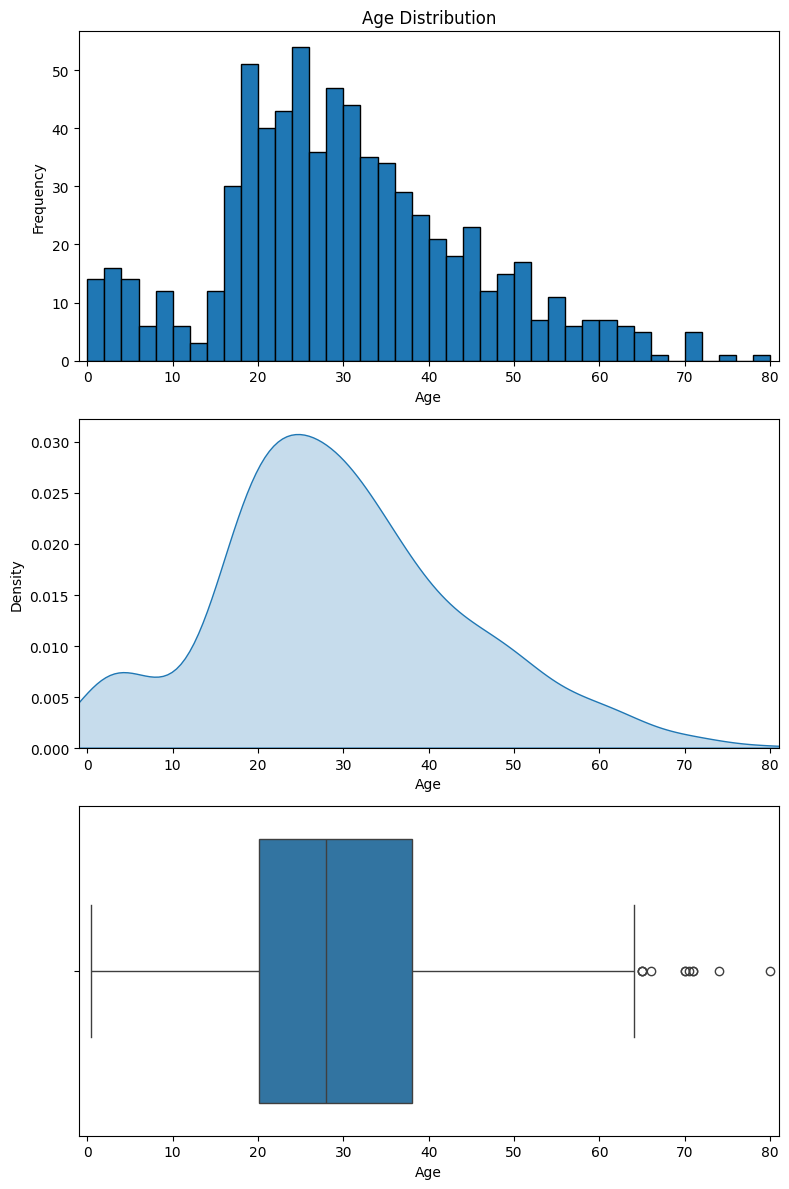

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

bins = np.linspace(0, 80, 41)
df['Age'].plot(kind='hist', bins=bins, edgecolor='black', alpha=1, ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(-1, df['Age'].max() + 1)

sns.kdeplot(df['Age'], fill=True, ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Density')
axes[1].set_xlim(-1, df['Age'].max() + 1)

sns.boxplot(x=df['Age'], ax=axes[2])
axes[2].set_xlim(-1, df['Age'].max() + 1)

plt.tight_layout()

Lets color the histogram by using the Survived column

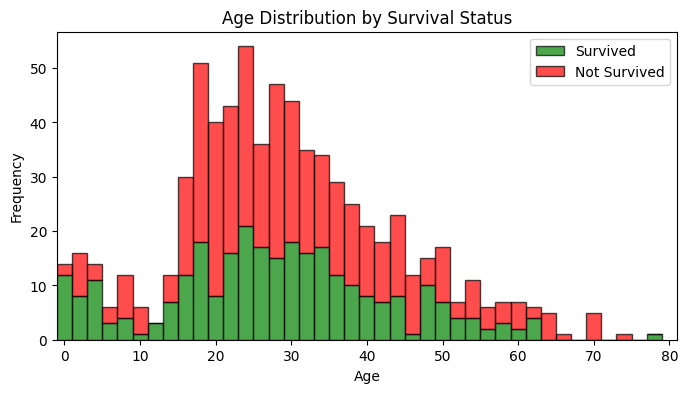

In [17]:
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

survived_hist, _ = np.histogram(survived['Age'], bins)
not_survived_hist, _ = np.histogram(not_survived['Age'], bins)

plt.figure(figsize=(8, 4))
plt.bar(
    bins[:-1],
    survived_hist,
    width=np.diff(bins),
    color='green',
    edgecolor='black',
    alpha=0.7,
    label='Survived'
)
plt.bar(
    bins[:-1],
    not_survived_hist,
    width=np.diff(bins),
    bottom=survived_hist,
    color='red',
    edgecolor='black',
    alpha=0.7,
    label='Not Survived'
)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(-1, 81)
plt.legend()
plt.show()

---

### Q3 - How were ticket classes priced?

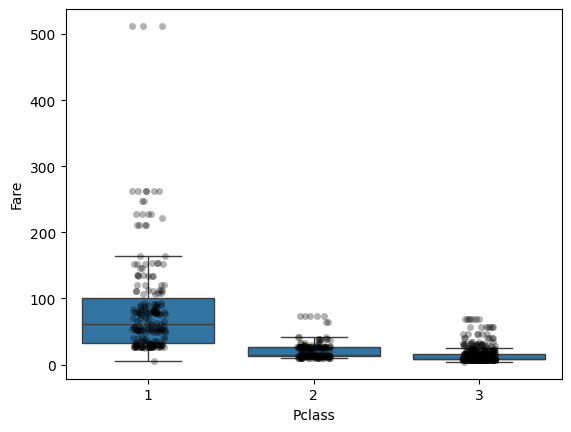

In [18]:
non_zero_fares = df[df['Fare'] > 0]
sns.boxplot(x='Pclass', y='Fare', data=non_zero_fares, showfliers=False)
sns.stripplot(
    x='Pclass',
    y='Fare',
    data=non_zero_fares,
    color='black',
    alpha=0.3,
)
plt.show()

1. Ticket class 2 and 3 does not seem to be too distinct by ticket price.

2. Ticket class 1 has some extremely pricey tickets.

3. Ticket class 1 has at least one very cheap ticket. This could be an error in the data.

### Investigation 3 - Cheap first class ticket

In [19]:
non_zero_fares[non_zero_fares['Pclass'] == 1].sort_values('Fare').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsMale
PassengerId,,,,,,,,,,,,
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,S,True
663,0,1,"Colley, Mr. Edward Pomeroy",male,47.0,0,0,5727,25.5875,E58,S,True
169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.925,NaN,S,True
797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,False
863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,False


It seems like the ticket class 1 has a record with 5.0 as the fare price, and the rest of the values are starting from 25+. The price of this cheap ticket is probably not correct or the Pclass value should be either 2 or 3.

Check if there are other records under the same Ticket. Maybe they have a correct Fare price.

In [20]:
non_zero_fares[non_zero_fares['Ticket'] == "695"]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsMale
PassengerId,,,,,,,,,,,,
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,S,True


Only 1 person has this ticket.

Let's check if there are others in the same cabin. Maybe that would lead us to the correct price.

In [21]:
non_zero_fares[non_zero_fares['Cabin'].str.contains('B51', na=False)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsMale
PassengerId,,,,,,,,,,,,
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,True
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,S,True


Let's see what other data belongs to Ticket "PC 17755"

In [22]:
non_zero_fares[non_zero_fares['Ticket'] == "PC 17755"]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsMale
PassengerId,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,False
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,True
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,True


Check how common this price range is

In [23]:
non_zero_fares[non_zero_fares['Fare'] > 300]\
.sort_values('Fare', ascending=False)\
.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsMale
PassengerId,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,False
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,True
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,True


What would be the mean value of a first class ticket?

In [24]:
avg_price = float(non_zero_fares[non_zero_fares['Pclass'] == 1]['Fare'].mean())
print("Average first class ticket price:", avg_price)

Average first class ticket price: 86.14887440758287


---

### Q4 - Can we see a correlation with the age of the passengers and the ticket class they had?

             Age    Pclass
Age     1.000000 -0.369226
Pclass -0.369226  1.000000


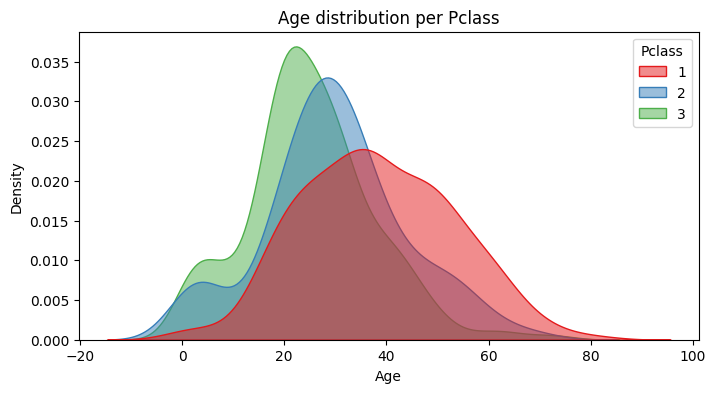

In [25]:
age_class = df[df['Age'].notnull()][['Age', 'Pclass']]
print(age_class.corr())

plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=age_class,
    x='Age',
    hue='Pclass',
    fill=True,
    common_norm=False,
    alpha=0.5,
    palette='Set1',
)
plt.title('Age distribution per Pclass')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

Looks like there is some correlation between Age and Pclass

---

### Q5 - Are older passengers wealthier?

Based on the plot above, we could say that they seem to be wealthier only looking at the Pclass, but we can also check the ticket prices to have a better idea

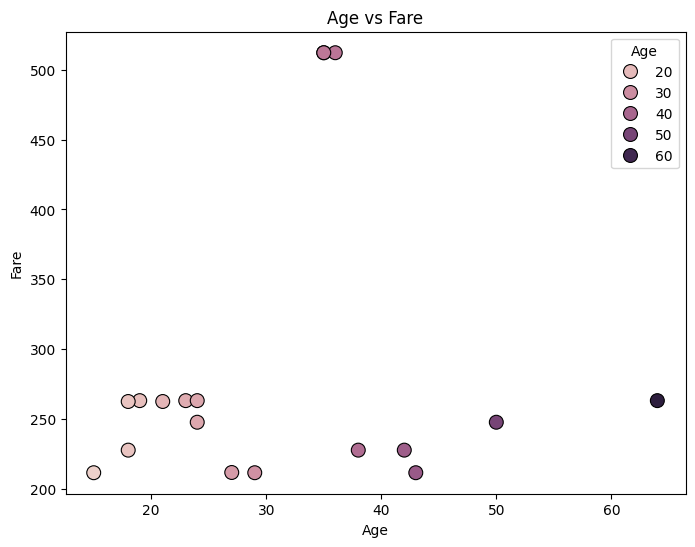

In [26]:
age_fare = df[(df['Age'].notnull()) & (df['Fare'] > 200)][['Age', 'Fare']]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=age_fare,
    x='Age',
    y='Fare',
    hue='Age',
    edgecolor='black',
    s=100
)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

The wealthiest individuals seems to be more on the younger side. Most of the higher priced tickets were bought by people younger than 45 years, and more than half of these tickets were bought by people under 30.

---

### Q6 - What is the gender ratio of passengers traveling alone?

We are going to define traveling alone as someone who has no relatives and no spouse on board.

In [27]:
df_alone = df[(df['SibSp'] == 0) & (df['Parch'] == 0)]
print(f"Number of passenger traveling alone: {df_alone.shape[0]}")

Number of passenger traveling alone: 537


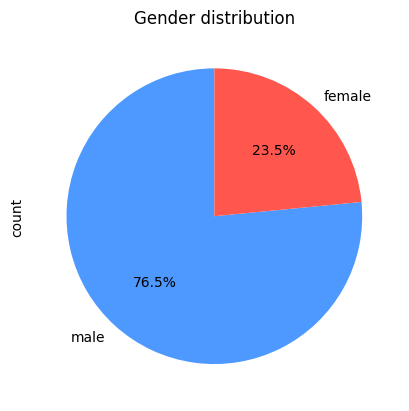

In [28]:
value_counts = df_alone['Sex'].value_counts()
colors = [BLUE if v == 'male' else RED for v in value_counts.index]
value_counts.plot(
    kind='pie',
    startangle=90,
    autopct='%1.1f%%',
    title='Gender distribution',
    colors=colors,
)
plt.show()

There seems to be a higher percentage of man traveling alone on the ship

---

### Q7 - Did passengers traveling alone have better or worse survival rate?

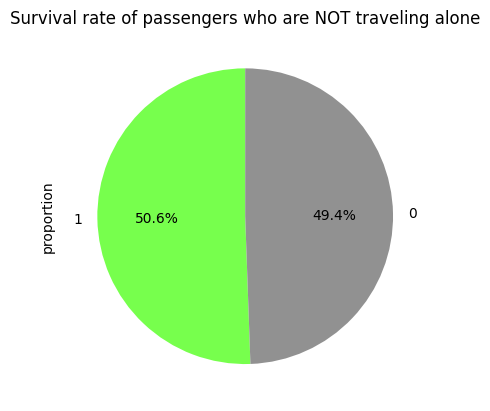

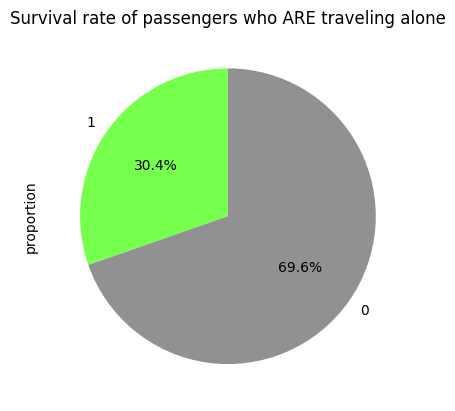

In [29]:
df_not_alone = df[(df['SibSp'] != 0) | (df['Parch'] != 0)]
value_counts = df_not_alone['Survived'].value_counts(normalize=True)
colors = [GRAY if v == 0 else GREEN for v in value_counts.index]
value_counts.plot(
    kind='pie',
    startangle=90,
    autopct='%1.1f%%',
    title='Survival rate of passengers who are NOT traveling alone',
    colors=colors,
)
plt.show()
value_counts = \
    df_alone['Survived']\
    .value_counts(normalize=True)\
    .sort_values(ascending=True)
colors = [GRAY if v == 0 else GREEN for v in value_counts.index]
value_counts.plot(
    kind='pie',
    startangle=90,
    autopct='%1.1f%%',
    title='Survival rate of passengers who ARE traveling alone',
    colors=colors,
)
plt.show()

Looks like people who traveled alone had a much worse survival rate. Could be contributed to the higher male to female ratio and that the children probably didnt travel alone. This combined with the "Women and children" rule at the life rafts could be the cause

---

### Q8 - How did the "Women and children" rule affect the survival rate of these two groups? (Children will be counted as <=12 years old)

In [30]:
favored_at_rafts = df[
    (df['Sex'] == 'female')
    | (0 < df['Age'])
    & (df['Age'] <= 12)
]
print(f'Number of "favored" passengers: {favored_at_rafts.shape[0]}')

Number of "favored" passengers: 351


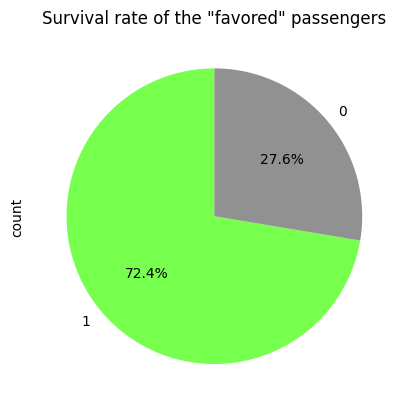

In [31]:
value_counts = favored_at_rafts['Survived'].value_counts()
colors = [GREEN if v == True else GRAY for v in value_counts.index]
value_counts.plot(
    kind='pie',
    startangle=90,
    autopct='%1.1f%%',
    title='Survival rate of the "favored" passengers',
    colors=colors,
)
plt.show()

In [32]:
male_adults = df[(df['Sex'] == 'male') & (df['Age'] > 12)]
print(f'Number of adult male passengers: {male_adults.shape[0]}')

Number of adult male passengers: 416


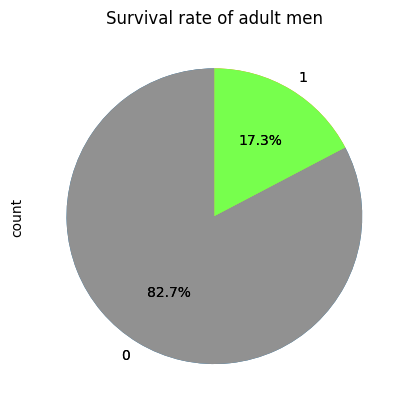

In [33]:
male_adults['Survived']\
.value_counts(normalize=True)\
.plot(
    kind='pie',
    startangle=90,
    autopct='%1.1f%%',
    title='Survival rate of adult men',
)

value_counts = male_adults['Survived'].value_counts()
colors = [GREEN if v == True else GRAY for v in value_counts.index]
value_counts.plot(
    kind='pie',
    startangle=90,
    autopct='%1.1f%%',
    title='Survival rate of adult men',
    colors=colors,
)
plt.show()

These two plots seems to clearly show that women and children had a much better chance to survive than adult men

---

## Try to fill in the missing values

Here we are checking the dataset for simple clues that could help us fill in the missing values in the **Embarked** column and the find the real price of the "free" tickets

Starting with the embarked column as there are only two missing value

In [34]:
df_no_embark = df[df['Embarked'].isnull()]
df_no_embark

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsMale
PassengerId,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,False
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,False


Check if there was someone else in their cabin. Maybe we could use their Embarked value

In [35]:
df[(df['Embarked'].notna()) & (df['Cabin'] == 'B28')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsMale
PassengerId,,,,,,,,,,,,


Maybe there is a correlation between the "B" cabins and where the Embark value

In [36]:
df[(df['Embarked'].notna()) & (df['Cabin'].str.startswith('B'))]['Embarked']\
.value_counts()

Embarked
S    23
C    22
Name: count, dtype: int64

In [37]:
df[(df['Embarked'].notna()) & (df['Cabin'].str.startswith('B'))]\
[['Embarked', 'Survived']]\
.value_counts()

Embarked  Survived
C         1           17
S         1           16
          0            7
C         0            5
Name: count, dtype: int64

In [38]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Let's use the most frequent value then... The Embarked column is probably not significant regarding the survival of the passenger. We found gender and age to be in the most impactful features anyways

The cabin column is mostly empty. We probably cant impute enough missing values for this column to make a significant impact on predicting the survival of the passenger

Missing Age data can be filled up with mean/median values or a regression model maybe

Missing Fare value could be imputed based on the Pclass or another passenger with the same ticket / cabin

In [39]:
df_zero_fare['Cabin'].drop_duplicates()

PassengerId
180     NaN
264     B94
807     A36
816    B102
Name: Cabin, dtype: object

In [40]:
df_zero_fare['Ticket'].drop_duplicates()

PassengerId
180      LINE
264    112059
278    239853
482    239854
634    112052
675    239856
733    239855
807    112050
816    112058
823     19972
Name: Ticket, dtype: object

In [41]:
if df[
    (df['Fare'].notna())
    & (df['Cabin'].isin(['B94', 'A36', 'B102']))
].size > 0:
    print('Match on Cabin')
else:
    print('Cant impute using Cabin column')

Cant impute using Cabin column


In [42]:
if df[
    (df['Fare'].notna())
    & (df['Ticket'].isin([
        'LINE', '112059', '239853', '239854', '112052', '239856', '239855',
        '112050', '112058', '19972'
    ]))
].size > 0:
    print('Match on Ticket')
else:
    print('Cant impute using Ticket column')

Cant impute using Ticket column


Well, looks like we have to use some statistical value here as well

In [43]:
df_zero_fare

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
